In [123]:
%pip install ebooklib wget bs4
import ebooklib
from ebooklib import epub
import pandas as pd
import numpy as np
import wget
import warnings
warnings.filterwarnings('ignore')


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [124]:
import os
cwd = os.getcwd()
if not os.path.exists(cwd + '/2018_earth_as_art-nasa.epub'):
    print('Downloading the book')
    wget.download(
        'https://www.nasa.gov/sites/default/files/atoms/files/2018_earth_as_art-nasa.epub', cwd + '/2018_earth_as_art-nasa.epub')
else:
    print('The book already exists')


The book already exists


In [125]:
book = epub.read_epub("2018_earth_as_art-nasa.epub")
items = list(book.get_items_of_type(ebooklib.ITEM_DOCUMENT))

In [126]:
#unzip epub file
import zipfile
with zipfile.ZipFile("2018_earth_as_art-nasa.epub", 'r') as zip_ref:
    zip_ref.extractall("2018_earth_as_art-nasa")
    

In [129]:
data = pd.DataFrame(columns=['title', 'location','description','url'])

In [130]:
from bs4 import BeautifulSoup
for item in items:
    df={}
    soup = BeautifulSoup(item.get_content(), "html.parser")
    txts = soup.getText().strip().split('\n')
    if len(txts) < 3 or len(soup.find_all('img')) <2:continue
    df['title'] = txts[0]
    df['location'] = txts[1]
    df['description'] = ' '.join(txts[2:])
    df['url'] = '2018_earth_as_art-nasa/OEBPS/' + \
        soup.find_all('img')[1]['src']
    data = data.append(df, ignore_index=True)

#delete the first and last row
data = data.drop([0, len(data)-1])



In [131]:
data.to_csv('earth.csv', index=False)

In [132]:
data.head()

,title,location,description,url
1,Akpatok Island,Canada,Akpatok Island rises sharply out of the frigid...,2018_earth_as_art-nasa/OEBPS/image/akpatok_isl...
2,Aleutian Clouds,Bering Sea,Clouds hover over the waters off the western A...,2018_earth_as_art-nasa/OEBPS/image/aleutian.jpg
3,Algerian Desert,Algeria,"Lying amid the Great Eastern Erg, the Great We...",2018_earth_as_art-nasa/OEBPS/image/algerian_sa...
4,Alluvial Fan,China,A vast alluvial fan unfolds across the desolat...,2018_earth_as_art-nasa/OEBPS/image/alluvial_fa...
5,Anti-Atlas Mountains,Morocco,A part of the Atlas Mountains in northwest Afr...,2018_earth_as_art-nasa/OEBPS/image/atlas_mts.jpg


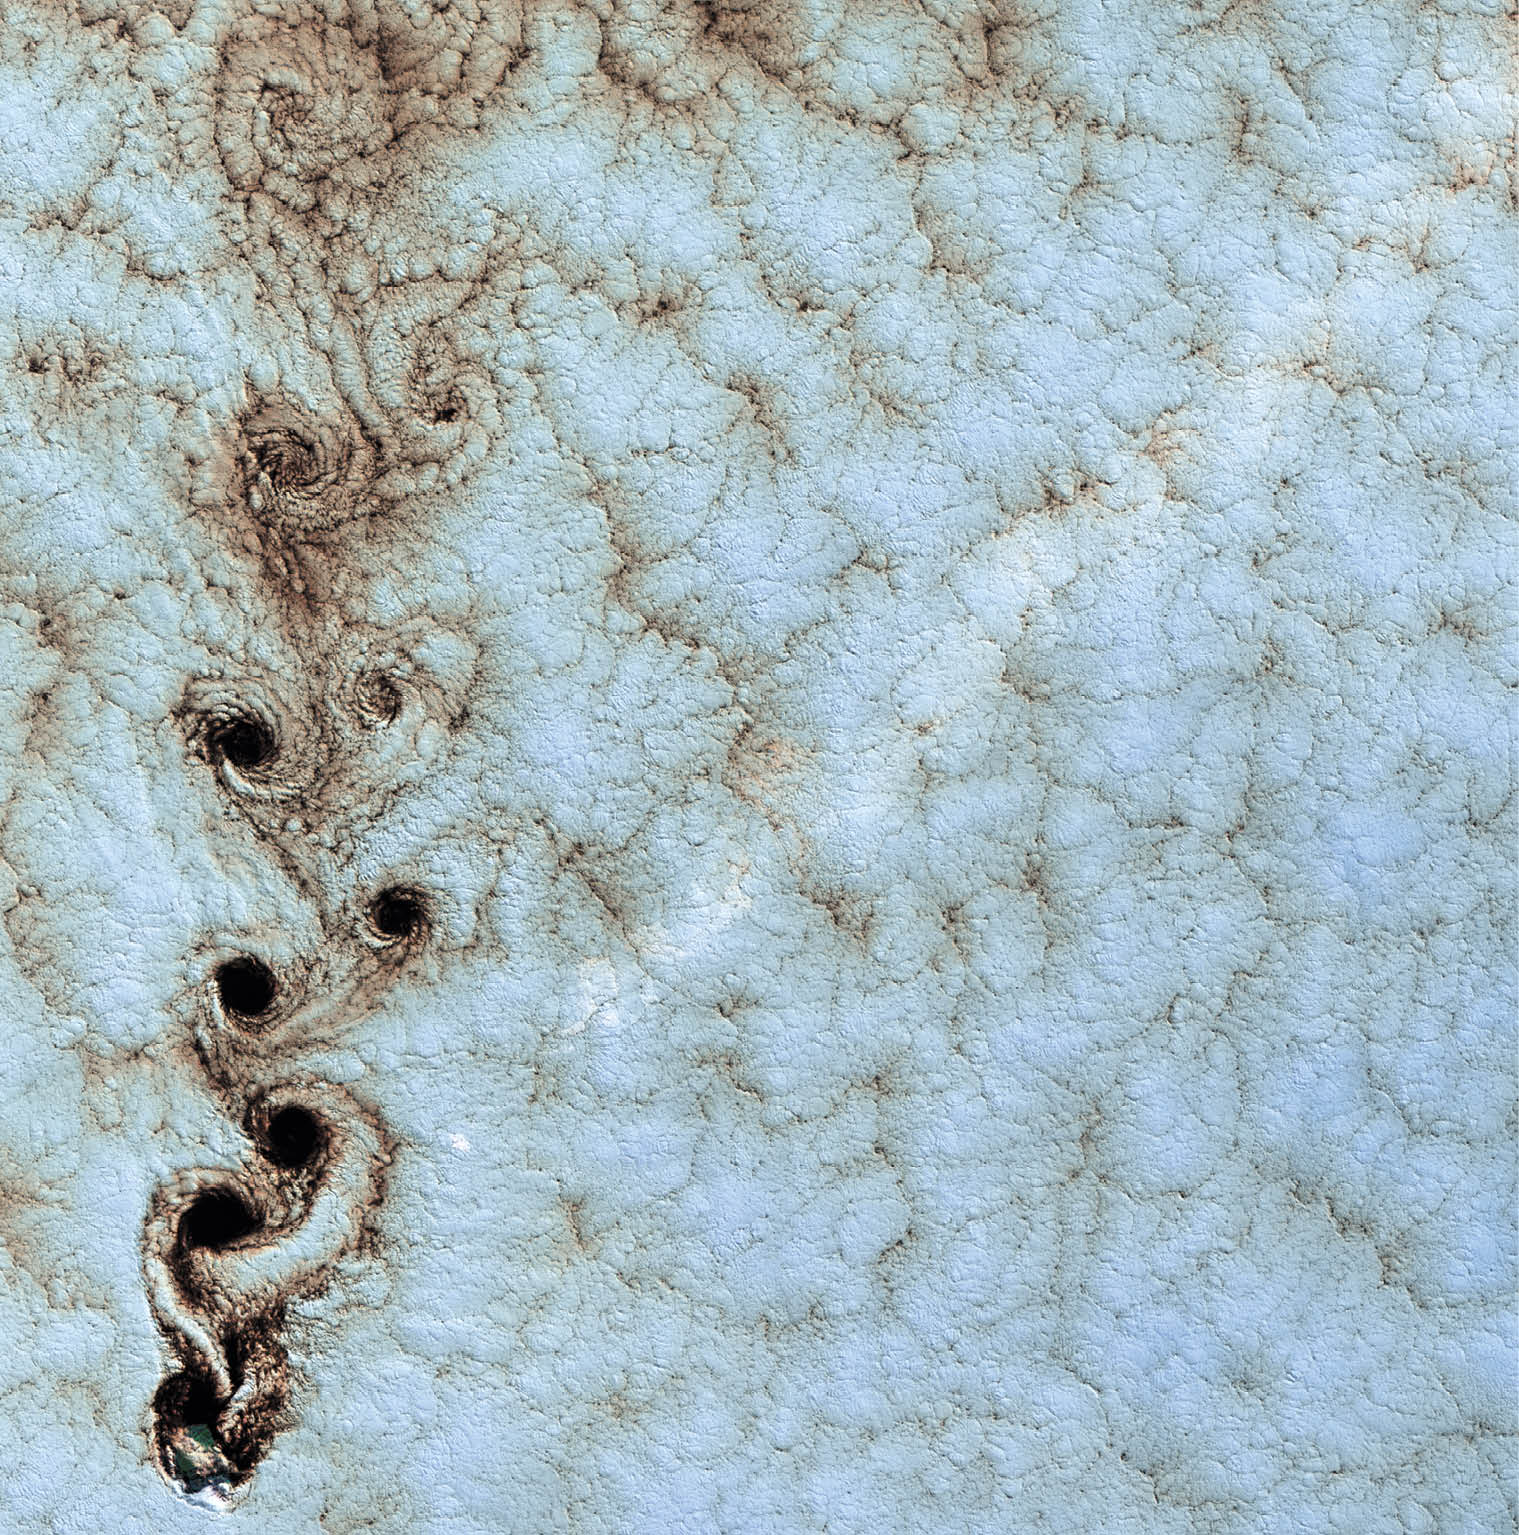

In [134]:
#display img
from IPython.display import Image
Image(filename=data['url'].iloc[72])

